In [1]:
from plot_tensorboard import extract_tensorboard_scalars
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
ppo_curriculum = extract_tensorboard_scalars("../logs/ppo_curriculum_1702255925", scalar_keys="charts/episodic_return")['charts/episodic_return']
ppo_norm = extract_tensorboard_scalars("../logs/ppo_normal_1702262388", scalar_keys="charts/episodic_return")['charts/episodic_return']
plot_plt = lambda df, **kw : plt.plot(df["step"], df["value"], **kw)
plot_plt_rolling = lambda df, window, **kw : plt.plot(df["step"], pd.DataFrame(df["value"]).rolling(window=window).mean(), **kw)

def plot_diff(color='red', interval=102400):
    x = np.arange(1, interval * 11, interval)
    plt.axvline(x = 0, color=color, linestyle='dashed', label="Difficulty Interval (0.1)")
    for i in x:
        plt.axvline(x = i, color=color, linestyle='dashed')

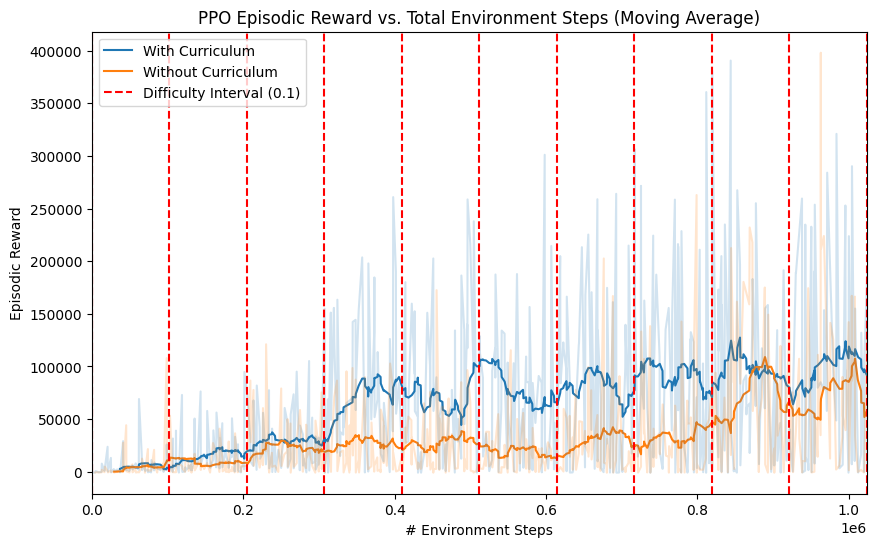

In [11]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
ppo_c = plot_plt_rolling(ppo_curriculum, PLOT1_WINDOW, label="With Curriculum")
ppo_n = plot_plt_rolling(ppo_norm, PLOT1_WINDOW, label="Without Curriculum")
plot_plt(ppo_curriculum, alpha=0.2, color=ppo_c[0].get_color())
plot_plt(ppo_norm, alpha=0.2, color=ppo_n[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Episodic Reward")
plt.xlim((0, 1024000))
plot_diff()
plt.legend()

plt.title("PPO Episodic Reward vs. Total Environment Steps (Moving Average)")

plt.savefig("images/PPO_figure.png")

In [5]:
ddpg_curriculum = extract_tensorboard_scalars("../logs/quad_with_vision__ddpg_cir__1__1702369471", scalar_keys="charts/episodic_return")['charts/episodic_return']
ddpg_norm = extract_tensorboard_scalars("../logs/quad_with_vision__ddpg_no_cir__1__1702345762", scalar_keys="charts/episodic_return")['charts/episodic_return']
ddpg_curriculum["step"] = np.multiply(ddpg_curriculum["step"], 256)
ddpg_norm["step"] = np.multiply(ddpg_norm["step"], 256)

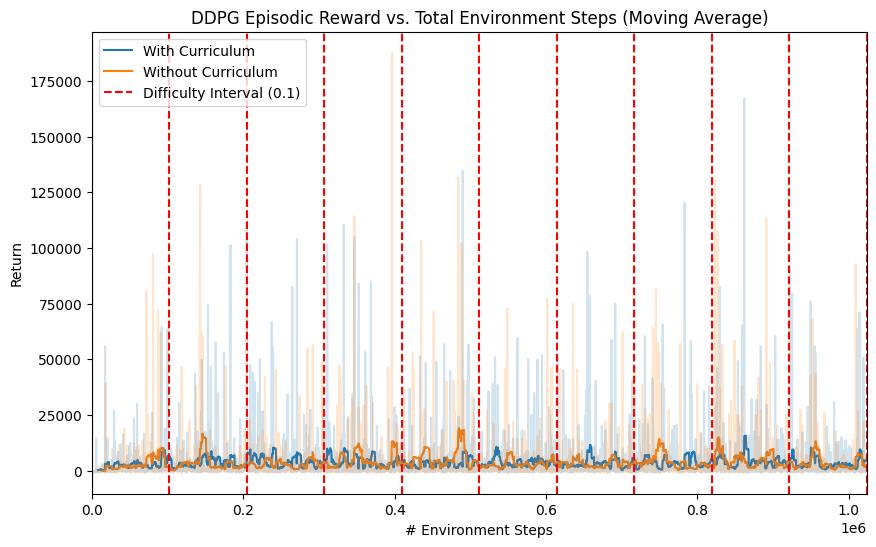

In [6]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
ddpg_c = plot_plt_rolling(ddpg_curriculum, PLOT1_WINDOW, label="With Curriculum")
ddpg_n = plot_plt_rolling(ddpg_norm, PLOT1_WINDOW, label="Without Curriculum")
plot_plt(ddpg_curriculum, alpha=0.2, color=ddpg_c[0].get_color())
plot_plt(ddpg_norm, alpha=0.2, color=ddpg_n[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Return")
plt.xlim((0, 1024000))
plot_diff()
plt.legend()

plt.title("DDPG Episodic Reward vs. Total Environment Steps (Moving Average)")

plt.savefig("images/DDPG_figure.png")

In [7]:
sac_curriculum = extract_tensorboard_scalars("../logs/sac_cirr", scalar_keys="charts/episodic_return")['charts/episodic_return']
sac_norm = extract_tensorboard_scalars("../logs/sac_wo_cirr", scalar_keys="charts/episodic_return")['charts/episodic_return']
sac_curriculum["step"] = np.multiply(sac_curriculum["step"], 256)
sac_norm["step"] = np.multiply(sac_norm["step"], 256)

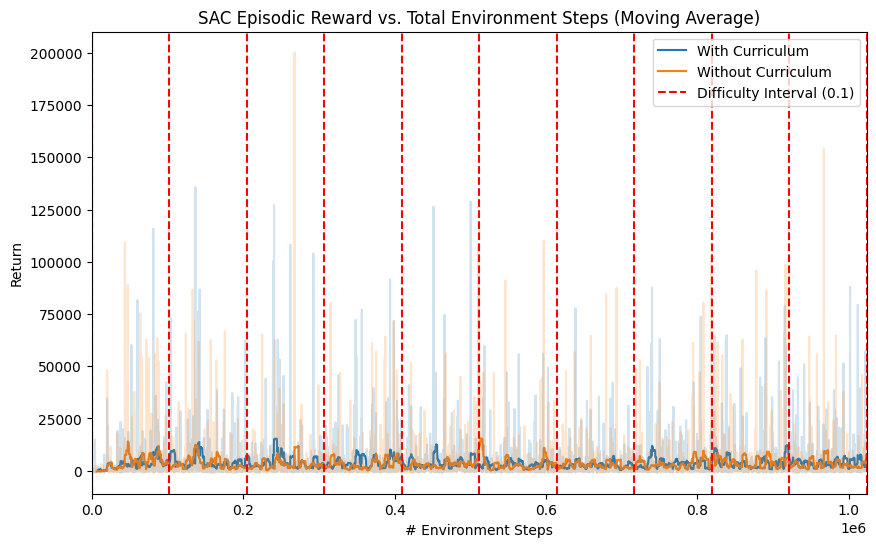

In [8]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
sac_c = plot_plt_rolling(sac_curriculum, PLOT1_WINDOW, label="With Curriculum")
sac_n = plot_plt_rolling(sac_norm, PLOT1_WINDOW, label="Without Curriculum")
plot_plt(sac_curriculum, alpha=0.2, color=sac_c[0].get_color())
plot_plt(sac_norm, alpha=0.2, color=sac_n[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Return")
plt.xlim((0, 1024000))
plot_diff()
plt.legend()

plt.title("SAC Episodic Reward vs. Total Environment Steps (Moving Average)")

plt.savefig("images/SAC_figure.png")

In [12]:
ppo_curr_eval = [extract_tensorboard_scalars("../logs/ppo_curr_d"+str(i+1), scalar_keys="charts/episodic_return")['charts/episodic_return'] for i in range(10)]
ppo_norm_eval = [extract_tensorboard_scalars("../logs/ppo_norm_d"+str(i+1), scalar_keys="charts/episodic_return")['charts/episodic_return'] for i in range(10)]
ppo_adv_eval = [extract_tensorboard_scalars("../logs/ppo_adv_d"+str(i+1), scalar_keys="charts/episodic_return")['charts/episodic_return'] for i in range(10)]
def count_min_episodes(evallist):
    val = float('inf')
    # val = 0
    val = []
    for ep in evallist:
        epvals = np.array(ep['value'])
        # val = min(val, len(epvals[np.abs(epvals) > 20000.0]))
        # val += len(ep['value'])
        val.append(len(epvals[np.abs(epvals) > 10000.0]))
    return val

# combined_array = np.array(ppo_curr_eval + ppo_norm_eval)
print("Min Episodes in Eval Runs:\t" + str(count_min_episodes(ppo_curr_eval + ppo_norm_eval)))

def get_valid_episodes(evallist):
    # val = float('inf')
    # val = 0
    val = []
    for ep in evallist:
        epvals = np.array(ep['value'])
        # val = min(val, len(epvals[np.abs(epvals) > 10000.0]))
        # val += len(ep['value'])
        val.append(epvals[np.abs(epvals) > 10000.0])
    return val

def calculate_success(evallist):
    vallist = get_valid_episodes(evallist)
    successes = []
    for vals in vallist:
        successes.append(np.sum(np.greater(vals[:70], 0))/70.0)
    return successes

print(calculate_success(ppo_curr_eval))
print(calculate_success(ppo_norm_eval))

Min Episodes in Eval Runs:	[75, 92, 72, 74, 77, 82, 84, 120, 86, 85, 87, 212, 68, 91, 72, 82, 102, 109, 114, 94]
[0.6571428571428571, 0.6714285714285714, 0.6142857142857143, 0.6428571428571429, 0.5714285714285714, 0.5, 0.5714285714285714, 0.42857142857142855, 0.4714285714285714, 0.4857142857142857]
[0.5857142857142857, 0.6, 0.5142857142857142, 0.5285714285714286, 0.5285714285714286, 0.6142857142857143, 0.5, 0.5428571428571428, 0.38571428571428573, 0.4857142857142857]


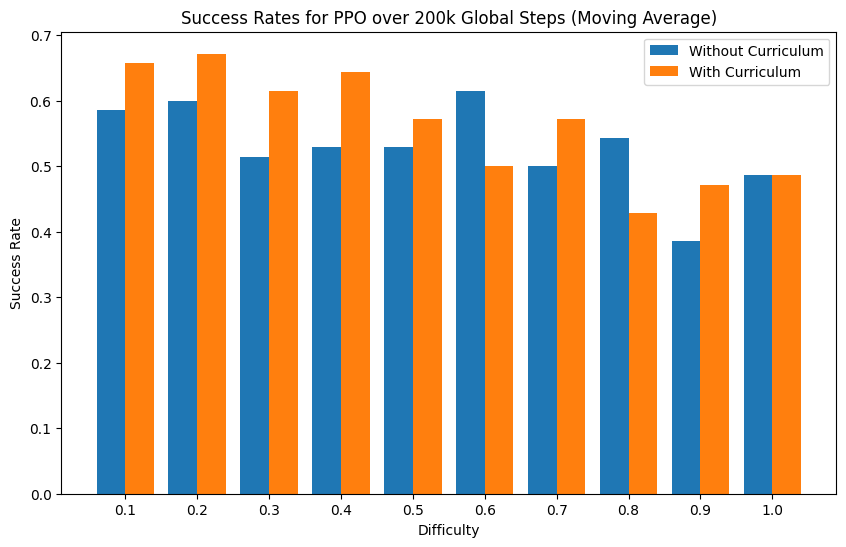

In [17]:
fig = plt.figure(figsize=(10, 6))
x = np.arange(1, 11, 1)
plt.bar(x - 0.2, calculate_success(ppo_norm_eval), width=0.4, align='center', label="Without Curriculum")
plt.bar(x + 0.2, calculate_success(ppo_curr_eval), width=0.4, align='center', label="With Curriculum")
plt.xlabel("Difficulty")
plt.ylabel("Success Rate")
plt.xticks(x, np.round(np.arange(0.1, 1.1, 0.1), 1))
plt.legend()

plt.title("Success Rates for PPO over 200k Global Steps (Moving Average)")

plt.savefig("images/PPO_eval.png")

In [18]:
ppo_curr_adv = extract_tensorboard_scalars("../logs/ppo_curr_12m_steps", scalar_keys="charts/episodic_return")['charts/episodic_return']

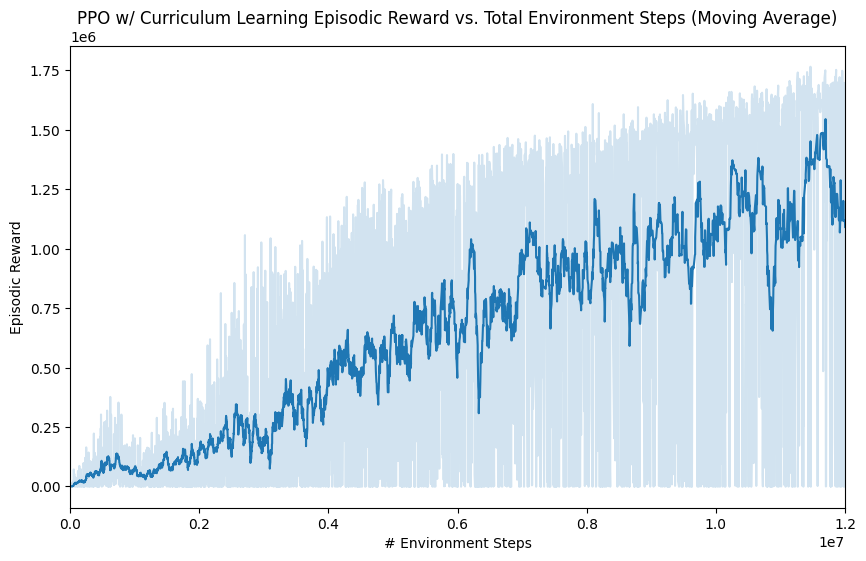

In [33]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
ppo_c = plot_plt_rolling(ppo_curr_adv, PLOT1_WINDOW)
plot_plt(ppo_curr_adv, alpha=0.2, color=ppo_c[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Episodic Reward")
plt.xlim((0, 12000000))

plt.title("PPO w/ Curriculum Learning Episodic Reward vs. Total Environment Steps (Moving Average)", y=1.03)

plt.savefig("images/PPO_adv_training.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.9571428571428572, 0.9714285714285714, 0.9428571428571428, 0.9571428571428572, 0.9, 0.9, 0.9, 0.8428571428571429, 0.8285714285714286, 0.8142857142857143]


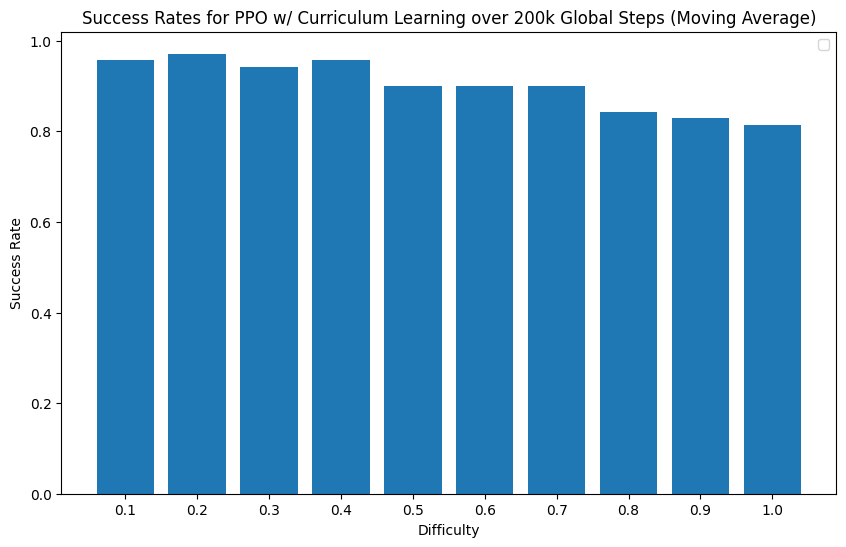

In [34]:
fig = plt.figure(figsize=(10, 6))
x = np.arange(1, 11, 1)
adv_successes = calculate_success(ppo_adv_eval)
print(adv_successes)
plt.bar(x, adv_successes, align='center')
plt.xlabel("Difficulty")
plt.ylabel("Success Rate")
plt.xticks(x, np.round(np.arange(0.1, 1.1, 0.1), 1))
plt.legend()

plt.title("Success Rates for PPO w/ Curriculum Learning over 200k Global Steps (Moving Average)")

plt.savefig("images/PPO_adv_eval.png")